In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def load_npy(filename):
    return np.load(filename)

### Plotting

In [56]:
def _common_output(filedir='.', filename='output'):
    array = load_npy(filedir+'/'+filename)
    output_mem = array[:,0]
    output_cpu = array[:,1]
    _mems = []
    _cpus = []
    for i, j in zip( output_mem, output_cpu):
        _mems.extend(i)
        _cpus.extend(j)
    return _mems, _cpus

#### practice

In [ ]:
#def _output_2(filename):
#    array = load_npy(filedir+'/'+filename)
#    output_mem = array[:,0, :]
#    output_cpu = array[:,1, :]

In [57]:
output1_mem_simple, output_cpu_simple = _common_output(filename="outputs_1_slurm-58255369-simple.npy")

In [58]:
len(output1_mem_simple), len(output_cpu_simple)

(5907, 5907)

In [61]:
np.asarray(output_cpu_simple).shape

(5907,)

#### gen ouput

In [62]:
filelist = [
    "outputs_1_slurm-58255369-simple.npy",
    "outputs_2_slurm-58255369-simple.npy",
    "outputs_3_slurm-58255369-simple.npy",
    "outputs_4_slurm-58255369-simple.npy"
]

In [63]:
mem_simple = []
cpu_simple = []
for ifile in filelist:
    _tmp_mem, _tmp_cpu = _common_output(filename=ifile)
    mem_simple.extend(_tmp_mem)
    cpu_simple.extend(_tmp_cpu)

In [65]:
np.asarray(cpu_simple).shape

(11952,)

(array([    0.,     0.,     0.,     0.,     0., 11952.,     0.,     0.,
            0.,     0.]),
 array([18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5]),
 <a list of 10 Patch objects>)

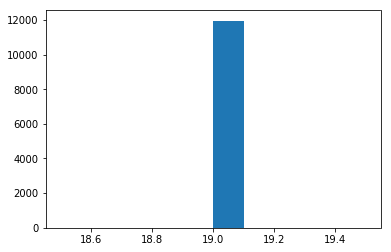

In [66]:
plt.hist(mem_simple)

(array([ 149.,  154.,    0.,    0.,   10.,   34., 1883.,   43.,   29.,
        9650.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

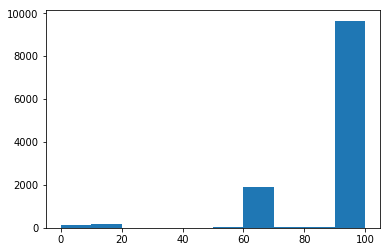

In [67]:
plt.hist(cpu_simple)

In [68]:
_filelist = [
    "outputs_1_slurm-58256907-htex_totaltime.npy",
    "outputs_2_slurm-58256907-htex_totaltime.npy",
    "outputs_3_slurm-58256907-htex_totaltime.npy",
    "outputs_4_slurm-58256907-htex_totaltime.npy"
]

In [76]:
mem_time = []
cpu_time = []
for ifile in _filelist:
    _tmp_mem, _tmp_cpu = _common_output(filename=ifile)
    mem_time.extend(_tmp_mem)
    cpu_time.extend(_tmp_cpu)

(array([    0.,     0.,     0.,     0.,     0., 11929.,     0.,     0.,
            0.,     0.]),
 array([16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2]),
 <a list of 10 Patch objects>)

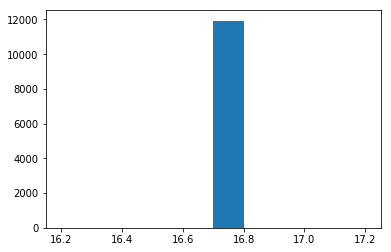

In [77]:
plt.hist(mem_time)

(array([1.180e+02, 1.550e+02, 0.000e+00, 7.000e+00, 2.700e+01, 1.700e+01,
        1.890e+03, 6.700e+01, 1.000e+01, 9.638e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

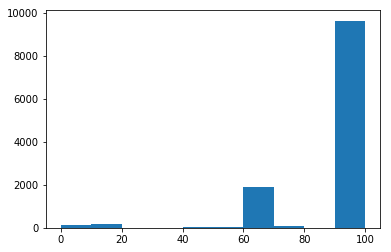

In [78]:
plt.hist(cpu_time)

### pairwise

In [83]:
np.mean(mem_simple), np.mean(mem_time)

(19.0, 16.699999999999996)

In [81]:
np.mean(cpu_simple), np.mean(cpu_time)

(91.14251171352075, 91.25474893117614)

In [84]:
np.std(mem_simple), np.std(mem_time)

(0.0, 3.552713678800501e-15)

In [85]:
np.std(cpu_simple), np.std(cpu_time)

(19.95017377244451, 19.56055178089552)

## Check IO array

### Ouptut 1

In [3]:
a = load_npy("./outputs_1_slurm-58255369-simple.npy")

In [4]:
a.shape

(100, 2)

In [6]:
b =  load_npy("./outputs_1_slurm-58256907-htex_totaltime.npy")

In [7]:
b.shape

(100, 2)

In [32]:
output1_simple_mem = a[:,0]
output1_simple_cpu = a[:,1]

In [31]:
output1_time_mem = b[:,0]
output1_time_cpu = b[:,1]

In [40]:
_a = []
for i in output1_simple_mem:
    _a.extend(i)

In [41]:
len(_a)

5907

### Output 2

In [12]:
c = load_npy("./outputs_2_slurm-58255369-simple.npy")

In [13]:
c.shape

(2, 2, 31)

In [15]:
c[0,0,:]

array([19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19.])

In [16]:
c[0,1,:]

array([59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ])

In [17]:
c[1,0,:]

array([19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19.])

In [18]:
c[1,1,:]

array([59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
       10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ])

In [51]:
output2_simple_mem = c[:,0,:]
output2_simple_cpu = c[:,1,:]

In [52]:
output2_simple_mem.shape

(2, 31)

In [53]:
_output2_simple_mem = c[:,0]

In [54]:
_output2_simple_mem.shape

(2, 31)

In [21]:
output2_simple_cpu

array([[59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ],
       [59.2, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7, 10.7, 10.7, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.9, 10.7,
        10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7,  0. ]])

In [22]:
len(output2_simple_mem)

2

In [23]:
_c = []
for i in output2_simple_mem:
    _c.extend(i)

In [25]:
len(_c)

62

### Output 3

In [26]:
d = load_npy("./outputs_3_slurm-58255369-simple.npy")

In [27]:
d.shape

(100, 2)

In [30]:
output3_simple_mem = d[:,0]

In [34]:
len(output3_simple_mem)

100

In [37]:
_d = []
for i in output3_simple_mem:
    _d.extend(i)

In [38]:
len(_d)

5899

In [42]:
e = load_npy("./outputs_4_slurm-58255369-simple.npy")

In [43]:
e.shape

(3, 2)

In [46]:
output4_simple_mem = e[:,0]

In [49]:
_e = []
for i in output4_simple_mem:
    _e.extend(i)

In [50]:
len(_e)

84